### Project Overview: Stock Price Predictions Using LSTM and RNN

#### Introduction
Stock price prediction is a significant challenge in the financial sector, involving complex patterns and inherent market volatility. Leveraging advanced deep learning techniques, particularly Long Short-Term Memory (LSTM) networks and Recurrent Neural Networks (RNNs), this project aims to build robust models to predict future stock prices based on historical data.

#### Objectives
- Develop predictive models using LSTM and RNN to forecast stock prices.
- Compare the performance of LSTM and RNN models in terms of accuracy and reliability.
- Analyze the impact of different features and time windows on the prediction accuracy.

#### Methodology
1. **Data Collection**:
   - Historical stock price data from sources like Yahoo Finance or Alpha Vantage.
   - Relevant features including opening price, closing price, high, low, volume, etc.

2. **Data Preprocessing**:
   - Cleaning and normalizing the data.
   - Splitting the data into training, validation, and test sets.
   - Creating time series sequences for input into the models.

3. **Model Development**:
   - Building RNN and LSTM models using libraries such as TensorFlow and Keras.
   - Tuning hyperparameters (e.g., number of layers, units, learning rate) for optimal performance.

4. **Model Training and Evaluation**:
   - Training the models on the prepared dataset.
   - Evaluating the models using metrics like Mean Squared Error (MSE) and Mean Absolute Error (MAE).
   - Cross-validation to ensure model robustness.

5. **Performance Comparison**:
   - Comparing the prediction accuracy of RNN and LSTM models.
   - Analyzing model performance based on different time windows and feature sets.

6. **Visualization**:
   - Plotting actual vs. predicted stock prices.
   - Visualizing model performance metrics.

#### Expected Outcomes
- Identification of the model (LSTM or RNN) that provides more accurate stock price predictions.
- Insights into the influence of various features and historical data lengths on prediction accuracy.
- A comprehensive understanding of the application of LSTM and RNN in time series forecasting.

#### Conclusion
This project seeks to harness the power of deep learning to enhance the accuracy of stock price predictions. By comparing LSTM and RNN models, we aim to provide valuable insights into their effectiveness in capturing market trends and aiding financial decision-making.

#### Tools and Technologies
- Programming Languages: Python
- Libraries: TensorFlow, Keras, NumPy, Pandas, Matplotlib, Scikit-learn
- Data Sources: Yahoo Finance, Alpha Vantage

### Timeline
- **Week 1-2**: Data collection and preprocessing
- **Week 3-4**: Model development and hyperparameter tuning
- **Week 5**: Model training and evaluation
- **Week 6**: Performance comparison and visualization
- **Week 7**: Documentation and final report preparation

This project promises to deliver a detailed analysis and practical models for stock price prediction, providing a foundation for future research and application in financial forecasting.

Important Libraries
TensorFlow: TensorFlow is a popular open-source library for machine learning and deep learning. It provides a flexible framework for building and training various types of neural networks. Refer to the TensorFlow documentation for more information.

Statsmodels: Statsmodels is a Python module for statistical modeling and inference. It offers a wide range of statistical models, including linear regression, time series analysis, and hypothesis testing. Refer to the Statsmodels documentation for more information.

NumPy: NumPy is a fundamental library for scientific computing in Python. It provides support for large, multi-dimensional arrays and a collection of mathematical functions to manipulate and analyze the data efficiently. Refer to the NumPy documentation for more information.

Scikit-learn: Scikit-learn is a comprehensive machine learning library in Python. It offers various algorithms for classification, regression, clustering, and dimensionality reduction, along with utilities for model evaluation and preprocessing. Refer to the scikit-learn documentation for more information.

Seaborn: Seaborn is a data visualization library based on Matplotlib. It provides a high-level interface for creating attractive and informative statistical graphics. Refer to the Seaborn documentation for more information.

Matplotlib: Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Refer to the Matplotlib documentation for more information.

Pandas: Pandas is a powerful library for data manipulation and analysis in Python. Refer to the Pandas documentation for more information.

yfinance: yfinance is a library that provides an easy way to download historical market data from Yahoo Finance. Refer to the yfinance GitHub repository for more information.

pandas_datareader: pandas_datareader is a library that allows easy access to online data sources, including Yahoo Finance, for retrieving financial data. Refer to the pandas_datareader documentation for more information.

pandas_ta: pandas_ta is a library that extends Pandas functionality with technical analysis indicators for financial data analysis. Refer to the pandas_ta GitHub repository for more information.

**Install Packages**

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# # Tested on Python 3.8.10
# !pip install tensorflow==2.12.0
# !pip install statsmodels==0.14.0
# !pip install numpy==1.23.5
# !pip install scikit-learn==1.2.2
# !pip install seaborn==0.12.2
# !pip install matplotlib==3.7.1
# !pip install pandas==2.0.2
# !pip install yfinance==0.2.18
# !pip install pandas_datareader==0.10.0
# !pip install pandas_ta==0.3.14b
# !pip install projectpro

In [3]:
!pip install pandas_ta==0.3.14b


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=5f610db7841457c4b4403fea7e59db337f056c045bf7fbdb2d498fde24b81505
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


# **Import Libraries**

In [4]:
from datetime import datetime
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import yfinance as yf
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler
from pandas_datareader.data import DataReader
from pandas_datareader import data as pdr
from keras.layers import LSTM, SimpleRNN
from keras.models import Sequential
from keras.layers import Dense
import pandas_ta as ta

In [5]:

# from projectpro import model_snapshot, checkpoint

In [6]:
keras.backend.set_image_data_format("channels_last")
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
yf.pdr_override()
%matplotlib inline

yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


# **Simple Neural Network in Tensorflow**

In [7]:
abalone_features = ["Length", "Diameter", "Height", "Whole weight", "Shucked weight",
                    "Viscera weight", "Shell weight", "Age"]

In [8]:
abalone_train = pd.read_csv(
    "https://storage.googleapis.com/download.tensorflow.org/data/abalone_train.csv",
    names=abalone_features)

abalone_test = pd.read_csv(
    "https://storage.googleapis.com/download.tensorflow.org/data/abalone_test.csv",
    names=abalone_features)


In [9]:
# Let's print our the first five columns of this dataset
abalone_train.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.435,0.335,0.110,0.334,0.1355,0.0775,0.0965,7
1,0.585,0.450,0.125,0.874,0.3545,0.2075,0.2250,6
2,0.655,0.510,0.160,1.092,0.3960,0.2825,0.3700,14
3,0.545,0.425,0.125,0.768,0.2940,0.1495,0.2600,16
4,0.545,0.420,0.130,0.879,0.3740,0.1695,0.2300,13


This dataset represents the different dimensional properties of seashells and their ages

In creating our simple neural network, We need a target feature for our model, this would be the feature we would be predicting and it is also called the predicted variable. The target feature of concern is the Age variable.

Let's do some Exploratory data analysis to see the relationship between the target variable(Age) and some other properties

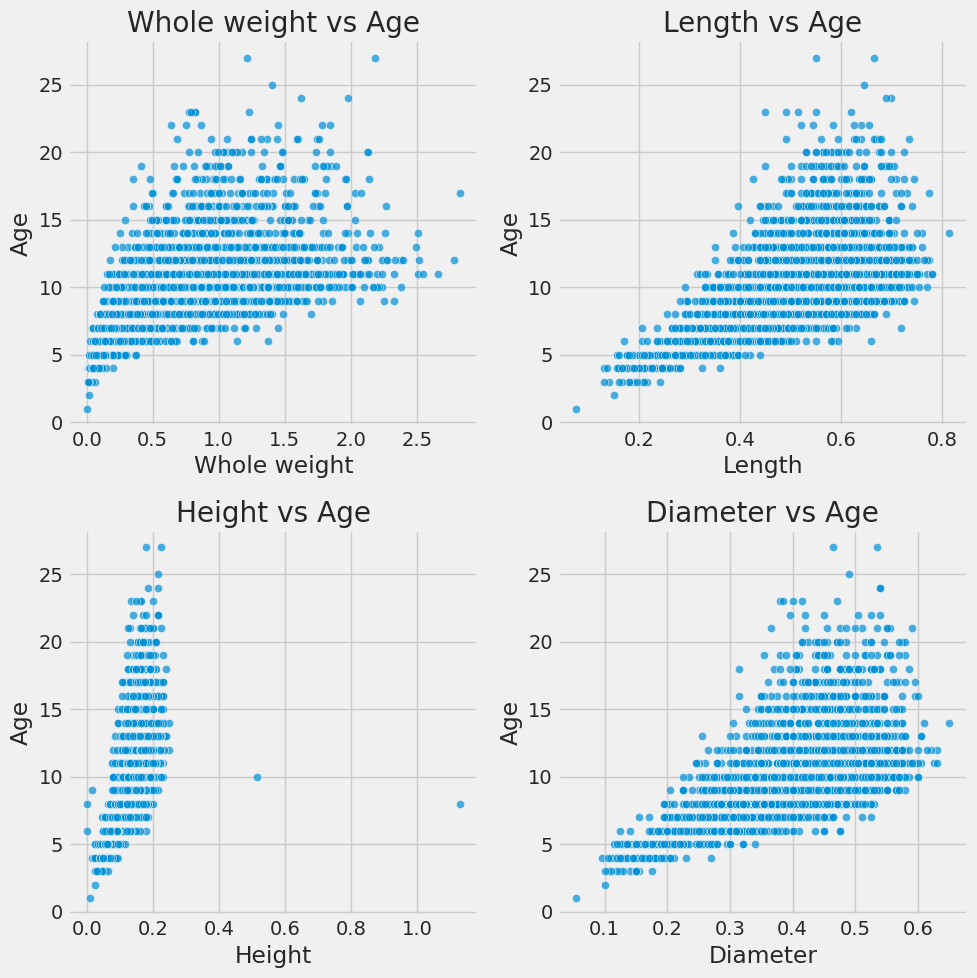

In [10]:
# Exploratory analysis with using charts
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Scatter plot
sns.scatterplot(x ='Whole weight', y='Age', data=abalone_train, alpha=.7, ax=axs[0, 0])
axs[0, 0].set_title('Whole weight vs Age')

sns.scatterplot(x ='Length', y='Age', data=abalone_train, alpha=.7, ax=axs[0, 1])
axs[0, 1].set_title('Length vs Age')

sns.scatterplot(x ='Height', y='Age', data=abalone_train, alpha=.7, ax=axs[1, 0])
axs[1, 0].set_title('Height vs Age')

sns.scatterplot(x ='Diameter', y='Age', data=abalone_train, alpha=.7, ax=axs[1, 1])
axs[1, 1].set_title('Diameter vs Age')

plt.tight_layout()

plt.show()

From this charts, we can see that is some sort of linear relationship between the Age feature and some of these other dimensional properties. That means we could use a simple or multiple linear regression model to predict the age of different seashells, for the purpose of experimentation, Let's create a multiple Linear regression to predict the ages of different seashels given different dimensional properties,

# **Import Libraries**

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# **Separate training and test labels**

In [12]:
abalone_train_features = abalone_train.copy()
abalone_train_labels = abalone_train_features.pop('Age')

In [13]:
abalone_test_features = abalone_test.copy()
abalone_test_labels = abalone_test_features.pop('Age')

# **Data Transformation**

It is important to transform our data as it is a crucial process in the optimization of supervised learning models like Linear Regression, An important type of data transformation needed for this model is normalization and it involves scaling the input data to a specific range or distribution. One feature may range from 0 to 1, while another feature may range from 0 to 1000. If these features are not normalized, the differences in scale can impact the accuracy of our regression model, limiting its ability.

In [14]:
# Now let's standardize our features
scaler = StandardScaler()
# # Fit scaler to the training data and transform it
abalone_train_scaled = scaler.fit_transform(abalone_train_features)

# Transform test data using the same scaler
abalone_test_scaled = scaler.transform(abalone_test_features)

# **Multiple Linear Regression**

In [15]:
model = LinearRegression()
model.fit(abalone_train_scaled, abalone_train_labels)

# Evaluate model

print(model.score(abalone_test_scaled, abalone_test_labels))

0.4895358359812434


Here we can see that our Linear Regression model performs averagely at best. Now let's try our simple neural network.

In [16]:
# First we normalize our dataset
normalize = tf.keras.layers.Normalization()
normalize.adapt(abalone_train_features)

In [17]:
abalone_model = tf.keras.Sequential([
    normalize, tf.keras.layers.Dense(64), tf.keras.layers.Dense(1)
    ])

In [18]:
abalone_model.compile(loss=tf.keras.losses.MeanSquaredError(),
                      optimizer=tf.keras.optimizers.Adam())

In [19]:
abalone_model.fit(abalone_train_features, abalone_train_labels, epochs=10)

Epoch 1/10
104/104 [==============================] - 2s 4ms/step - loss: 91.6708
Epoch 2/10
104/104 [==============================] - 0s 3ms/step - loss: 51.8812
Epoch 3/10
104/104 [==============================] - 0s 4ms/step - loss: 16.0287
Epoch 4/10
104/104 [==============================] - 0s 3ms/step - loss: 5.9696
Epoch 5/10
104/104 [==============================] - 0s 2ms/step - loss: 5.1768
Epoch 6/10
104/104 [==============================] - 0s 2ms/step - loss: 5.1035
Epoch 7/10
104/104 [==============================] - 0s 2ms/step - loss: 5.0457
Epoch 8/10
104/104 [==============================] - 0s 2ms/step - loss: 5.0244
Epoch 9/10
104/104 [==============================] - 0s 2ms/step - loss: 5.0017
Epoch 10/10
104/104 [==============================] - 0s 4ms/step - loss: 4.9922


In [20]:
predictions = abalone_model.predict(abalone_test_features)

27/27 [==============================] - 0s 3ms/step


# **Time Series Data (NETFLIX Stocks)**

Loading data

In [21]:
dataset = pdr.get_data_yahoo('NFLX', start='2012-01-01', end=datetime.now())

[*********************100%%**********************]  1 of 1 completed


In [22]:
dataset.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,10.040000,10.388571,10.018571,10.320000,10.320000,29213800
2012-01-04,10.335714,11.567143,10.258571,11.492857,11.492857,100489900
2012-01-05,11.345714,11.694286,11.040000,11.328571,11.328571,86552900
2012-01-06,11.302857,12.471429,11.242857,12.327143,12.327143,125610800
2012-01-09,12.801429,14.235714,12.448571,14.025714,14.025714,214073300


Plotting training and test data

In [23]:
tstart = 2016
tend = 2020

In [24]:
def train_test_plot(dataset, tstart, tend):
    dataset.loc[f"{tstart}":f"{tend}", "High"].plot(figsize=(16, 4), legend=True)
    dataset.loc[f"{tend+1}":, "High"].plot(figsize=(16, 4), legend=True)
    plt.legend([f"Train (Before {tend+1})", f"Test ({tend+1} and beyond)"])
    plt.title("Netflix stock price")
    plt.show()

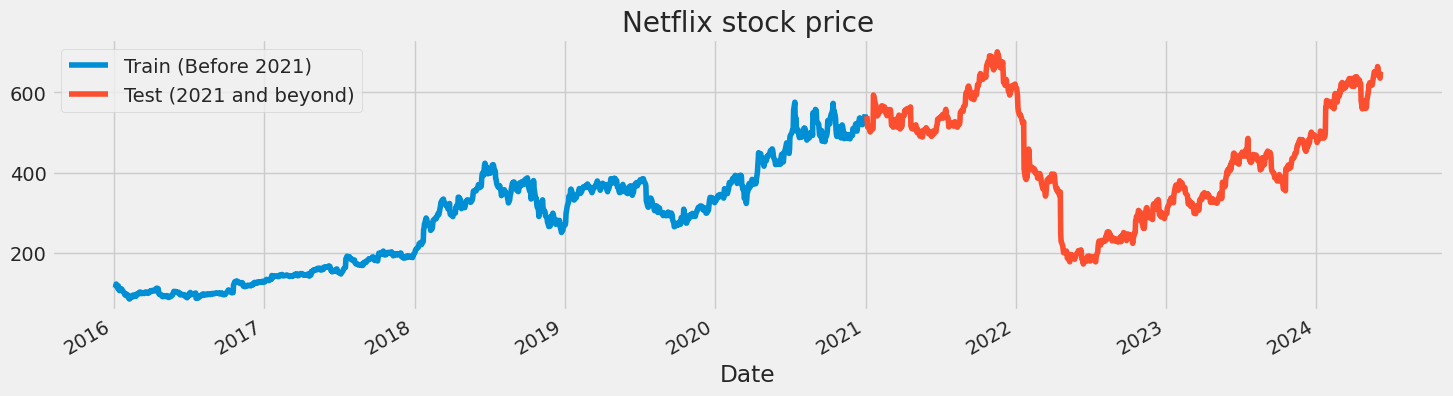

In [25]:
train_test_plot(dataset, tstart, tend)

In [26]:
def train_test_split(dataset, tstart, tend, columns = ['High']):
    train = dataset.loc[f"{tstart}":f"{tend}", columns].values
    test = dataset.loc[f"{tend+1}":, columns].values
    return train, test

In [27]:
training_set, test_set = train_test_split(dataset, tstart, tend)

Scaling dataset values (Normalization)

In [28]:
sc = MinMaxScaler(feature_range=(0, 1))
training_set = training_set.reshape(-1, 1)
training_set_scaled = sc.fit_transform(training_set)

# Creating overlapping window batches

One way of creating neural network models using time series data is to split the data into sequences, we can extract a time window in the data and use it to predict a point in the future, our window size may vary depending on the nature and the context of the dataset.

In [29]:
n_steps = 1
features = 1

In [30]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence) - 1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In the above line of code, we want to create data batches for our model, separating our dataset into batches based on our time series. based on the number of steps, we could use the Highest price for three consecutive days to predict the price of the fourth day. We're doing this because price moves in trends and daily movement of price is usually dependent onthe previous day's movement of price.

**NB:** This is based on the assumption that there are no externalities that impact price

In [31]:
X_train, y_train = split_sequence(training_set_scaled, n_steps)

In [32]:
def plot_predictions(test, predicted, title):
    plt.plot(test, color="gray", label="Real")
    plt.plot(predicted, color="red", label="Predicted")
    plt.title(f'{title}')
    plt.xlabel("Time")
    plt.ylabel(f'{title}')
    plt.legend()
    plt.show()

In [33]:
def return_rmse(test, predicted):
    rmse = np.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {:.2f}.".format(rmse))

# Vanilla RNN

To measure how our model performs over each epoch during the training process, we need a function that would show us how our prediction error reduces over each epoch. We first create a function that plots the error/loss size over each epoch.

In [34]:
def plot_loss(history):
    plt.figure(figsize = (15,10))
    plt.plot(history.history['loss'], label='loss')
    plt.legend(loc='best')
    plt.show()

Instantiate and Compile the model

In [35]:
rnn_model = Sequential()
rnn_model.add(SimpleRNN(units=125, input_shape=(n_steps, features)))
rnn_model.add(Dense(units=1))

In [36]:
# Compiling the model
rnn_model.compile(optimizer="RMSprop", loss="mse")

In [37]:
history = rnn_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

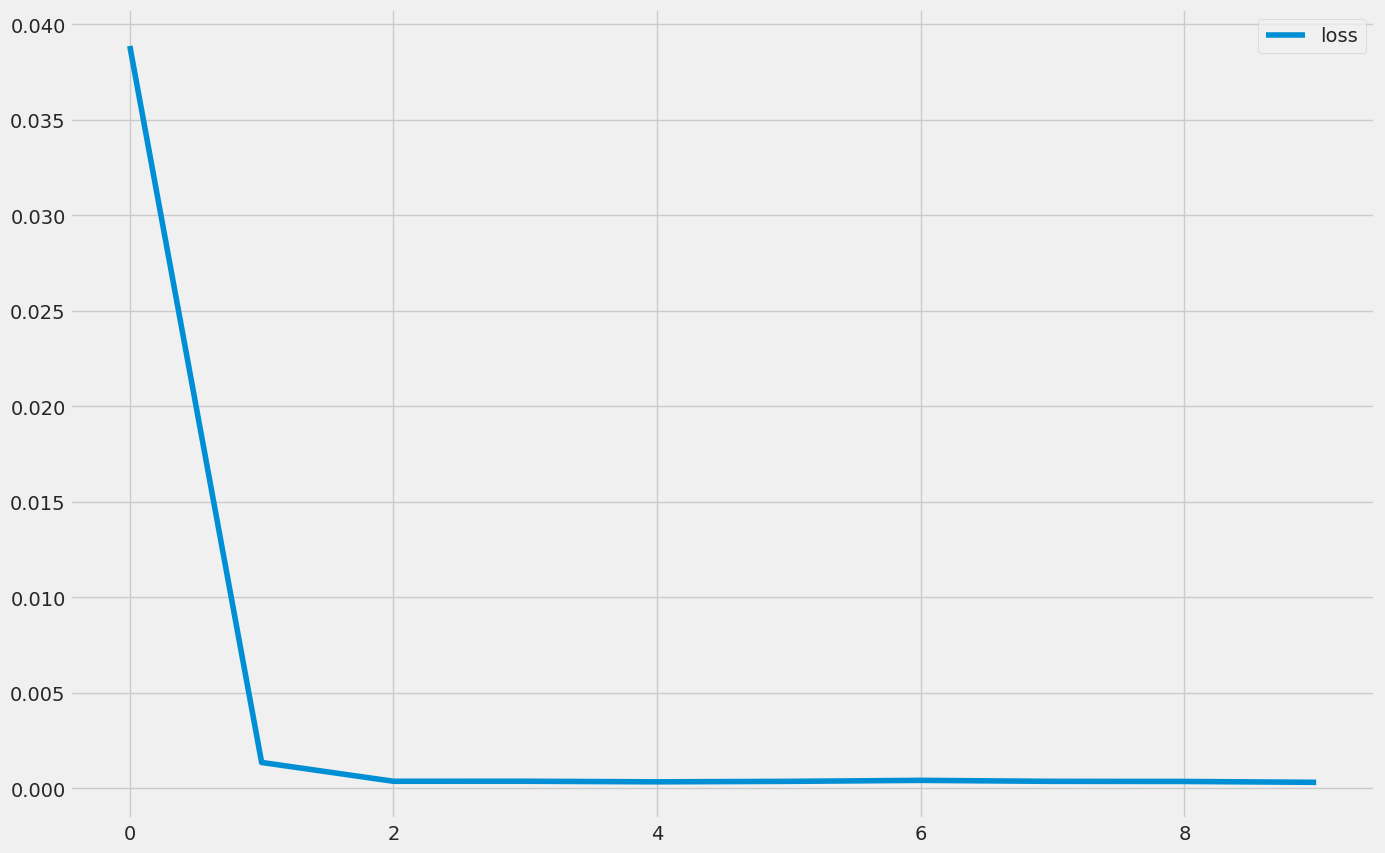

In [38]:
plot_loss(history)

# **Stock Price Prediction**

To Ensure consistensy in the overall process, before running our predictions, we must first modify our test data by splitting it into equal windows/sequences like we did with our training data.

In [39]:
# Scaling
inputs = sc.transform(test_set.reshape(-1, 1))

In [40]:
# Split into  window samples
X_test, y_test = split_sequence(inputs, n_steps)
# reshape
X_test = X_test.reshape(-1, n_steps, features)

In [41]:
# Prediction
predicted_stock_price = rnn_model.predict(X_test)
# Inverse transform the values
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

27/27 [==============================] - 1s 3ms/step


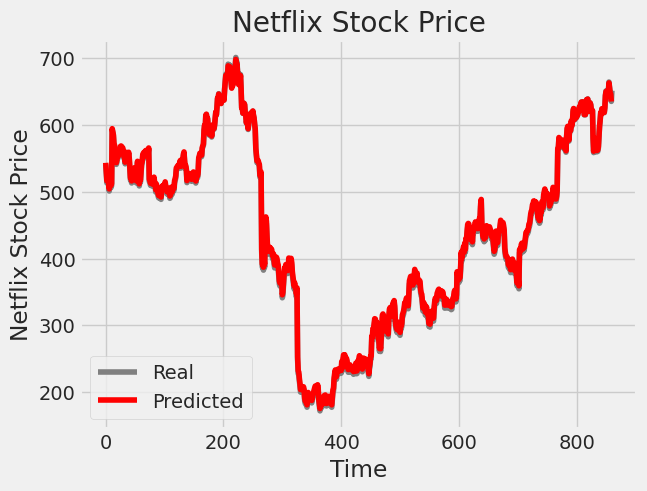

In [42]:
plot_predictions(test_set, predicted_stock_price, "Netflix Stock Price")

Yes, the predictions are almost accurate, but applying this model in the real world could really hurt a short-term stock trader's equity. Looking at the visualized overlay of the actual vs predicted data, it looks like the real data is a shadow of the predicted data which is the result of the differences in values between the actual and predicted data.
The predicted values are ambitious and the real values tend to have lower dips in bearish markets it. A stock trader's equity could bleed when price goes lower than anticipated.



# **LSTM**

LSTM which is short for Long-short-term-memory models are an upgrade to RNNs(Recursive Neural Networks). A down side to RNNs is the Vanishing Gradient problem. This is a difficulty found in training artificial neural networks with gradient-based learning methods and backpropagation. In a Neural Network, each of the hiddel layers receives an update proportional to the partial derivative of the error function with respect to the current weight in each iteration of training. The problem is that in some cases, as we propagate gradients back through many steps, the product of derivatives can results in values less than 1, then as the number of time steps increases the gradients exponentially decrease towards zero. This can result in slow learning and also a difficulty in learning Long-term dependencies as represented in the Netflix Stock Price Data

LSTMs were developed to fix the vanishing gradient problem that plagues RNNs It consists a cell, an input gate, an output gate and also a forget gate. The cell is responsible for remembering values over arbitrary time intervals; hence the word "memory" in LSTM. The model can hold on to information for a longer period and this architecture helps to control the flow of information, enabling better gradient flow through long sequences.

**Create and Compile Model**

In [43]:
model_lstm = Sequential()
model_lstm.add(LSTM(units=125, input_shape=(n_steps, features)))
model_lstm.add(Dense(units=1))

In [44]:
# Compiling the model
model_lstm.compile(optimizer="RMSprop", loss="mse")

In [45]:
history = model_lstm.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

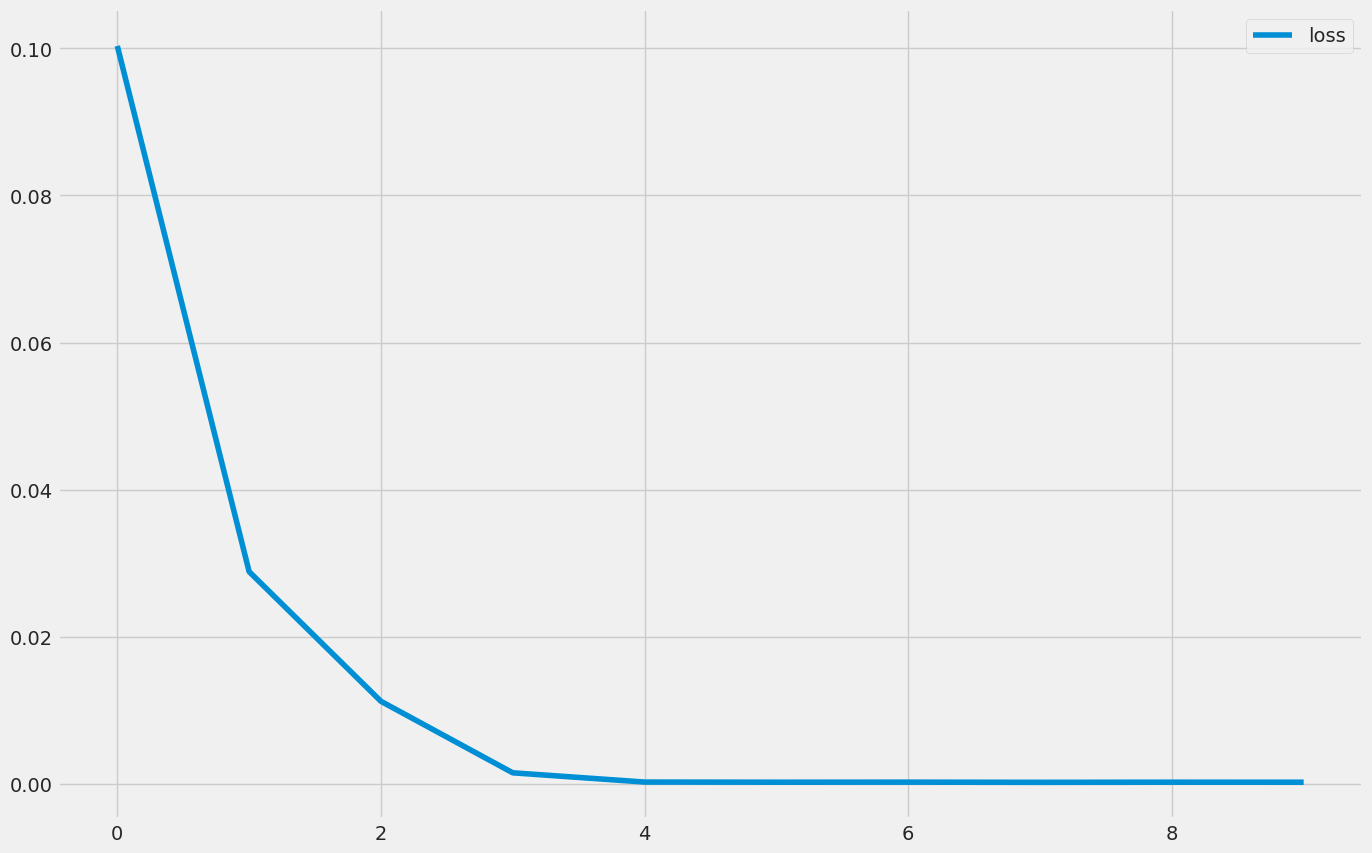

In [46]:
plot_loss(history)

**Run Prediction**

In [47]:
predicted_stock_price = model_lstm.predict(X_test)
#inverse transform the values
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

27/27 [==============================] - 2s 7ms/step


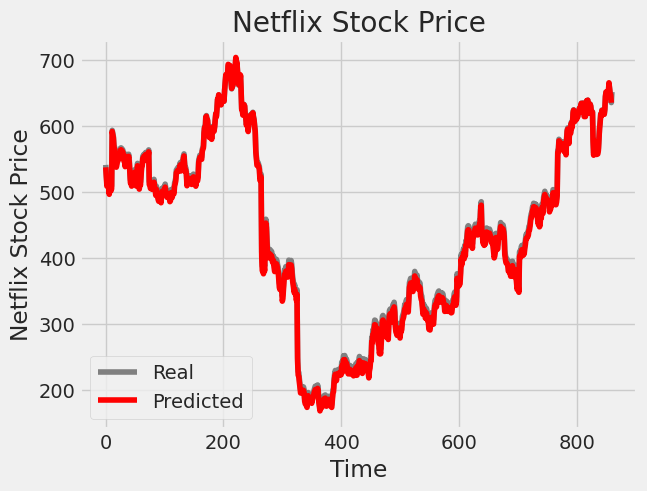

In [48]:
plot_predictions(test_set, predicted_stock_price, "Netflix Stock Price")

The result of this predictions is somewhat similar to that of the RNN model, except that it is more conservative and performs better bullish price trends which could not be said for the RNN model. But overall, there are still some disparities which can be visualised in the data overlay of the actual vs predicted values.

# **Multivariate Input**


RNNs can also be used with datasets with multiple dimensions. In this case, each dimension would represent different time series

Adding more variables like technical indicators including Relative Strength Index (RSI) and Exponential Moving Averages (EMA) could help to improve the performance of the RNN model.

Relative Strength Index (RSI): This is a momentum indicator used in technical analysis. RSI measures the speed and magnitude of a financial instrument's recent price changes to evaluate overvalued or undervalued conditions in the price of that instrument.

Exponential Moving Average (EMA): This is a type of moving average that places a greater weight and significance on the most recent data points. It relays the magnitude of most recent price changes through its steepness, It is visualised on price charts as a single line plot.

In [49]:
mv_features = 5
# Number of features that would be in the multi-variate dataset

In [50]:
multi_variate_df = dataset.copy()

In [51]:
multi_variate_df['RSI'] = ta.rsi(multi_variate_df.Close, length=15)
multi_variate_df['EMAF'] = ta.ema(multi_variate_df.Close, length=20)
multi_variate_df['EMAM'] = ta.ema(multi_variate_df.Close, length=100)
multi_variate_df['EMAS'] = ta.ema(multi_variate_df.Close, length=150)

In [52]:
# clean the dataset up by removing observations with missing data.
multi_variate_df.dropna(inplace=True)
# Further cleaning by removing columns that can make our model redundant
multi_variate_df.drop(['Volume', 'Close'], axis=1, inplace=True)

RSI Visualizatioon

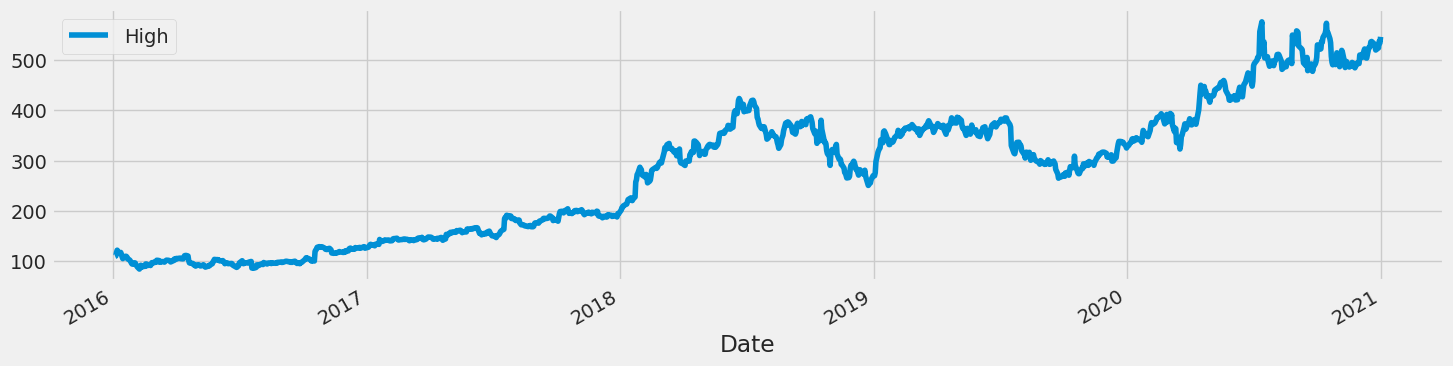

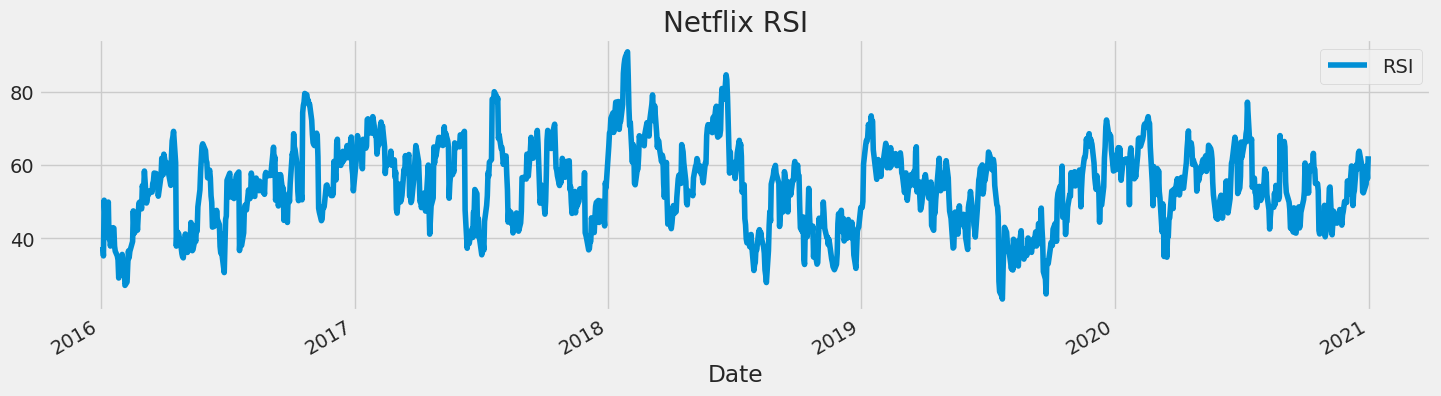

In [53]:
multi_variate_df.loc[f"{tstart}":f"{tend}", ['High']].plot(figsize=(16, 4), legend=True)
multi_variate_df.loc[f"{tstart}":f"{tend}", ['RSI']].plot(figsize=(16, 4), legend=True)

plt.title("Netflix RSI")
plt.show()

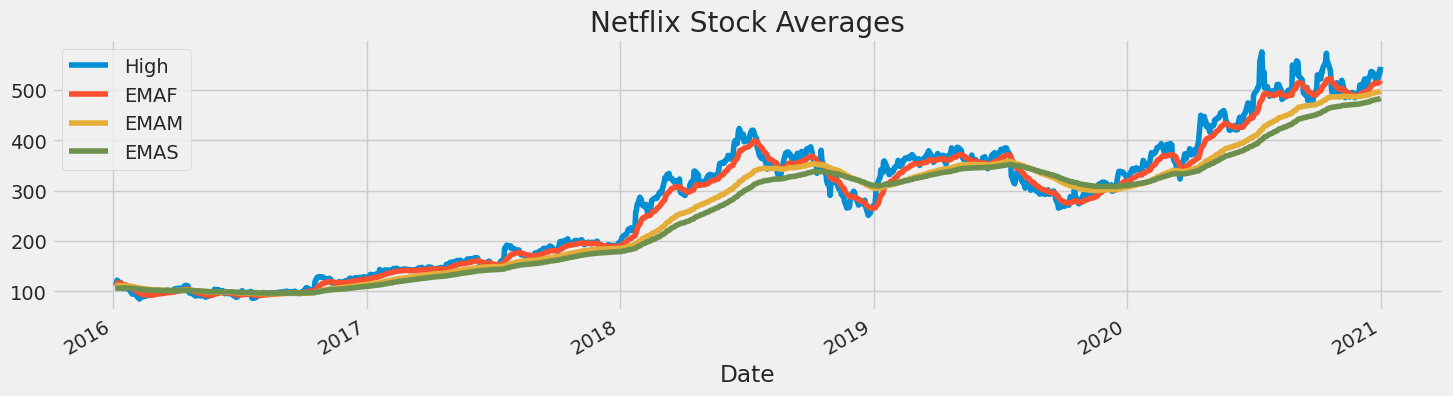

In [54]:
multi_variate_df.loc[f"{tstart}":f"{tend}", ['High', 'EMAF', 'EMAM', 'EMAS']].plot(figsize=(16, 4), legend=True)
plt.title("Netflix Stock Averages")
plt.show()

# Splitting train and test data

In [55]:
feat_columns =  ['Open', 'RSI', 'EMAF', 'EMAM', 'EMAS']
target_col = ['High']

In [56]:
mv_training_set, mv_test_set = train_test_split(multi_variate_df, tstart, tend, feat_columns + target_col)

In [57]:
X_train = mv_training_set[:, :-1]
y_train = mv_training_set[:, -1]

X_test = mv_test_set[:, :-1]
y_test = mv_test_set[:, -1]

# Scaling Data

In [58]:
mv_sc = MinMaxScaler(feature_range=(0, 1))
X_train = mv_sc.fit_transform(X_train).reshape(-1, 1, mv_features)
X_test = mv_sc.transform(X_test).reshape(-1, 1, mv_features)

# Create Model

In [59]:
model_mv = Sequential()
model_mv.add(LSTM(units=125, input_shape=(1, mv_features)))
model_mv.add(Dense(units=1))
# Compiling the model
model_mv.compile(optimizer="RMSprop", loss="mse")

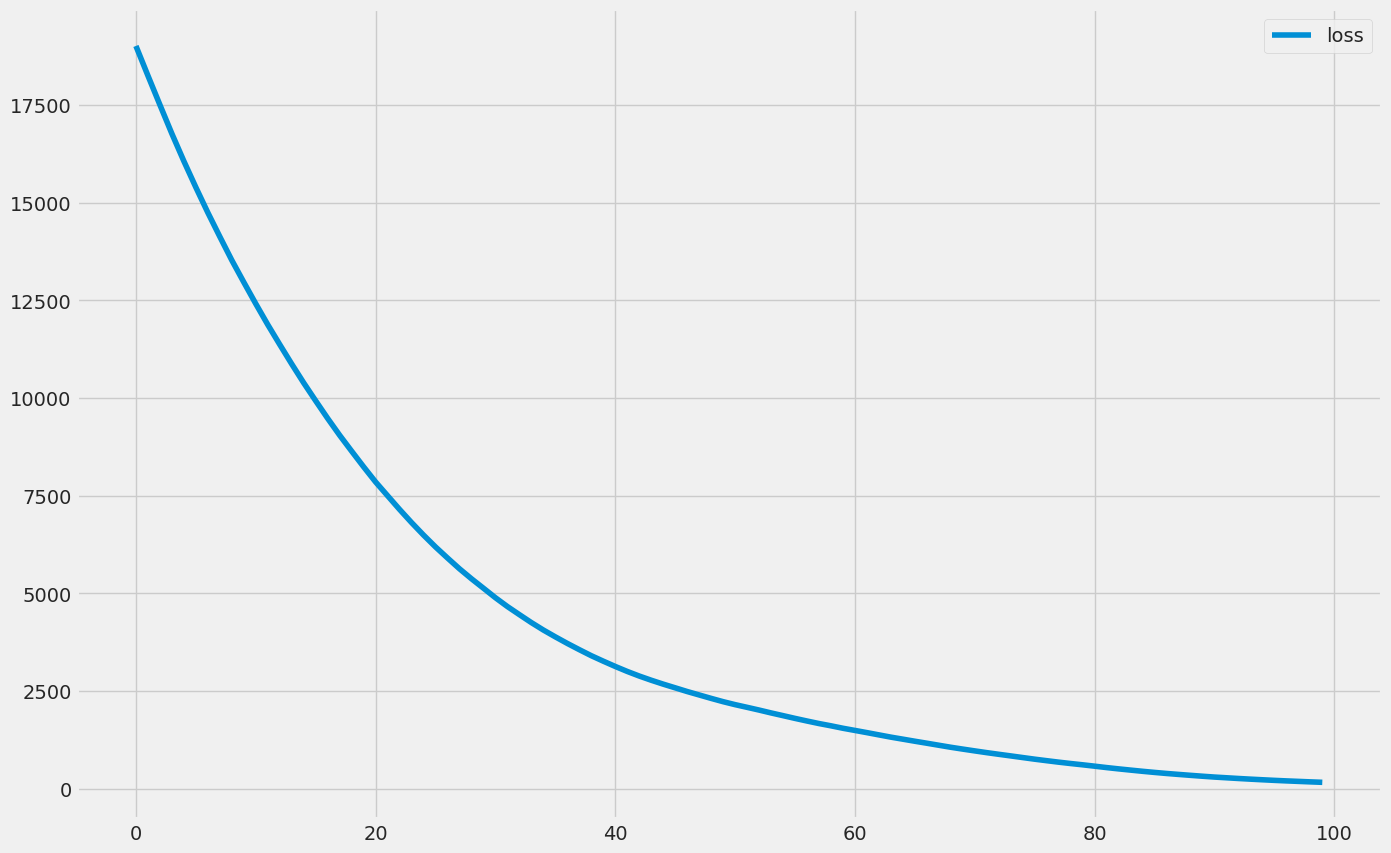

In [62]:
history = model_mv.fit(X_train, y_train, epochs=100, batch_size=30, verbose=0)
plot_loss(history)

This new model does not really perform well compared to the previous model as shown in this loss plot, there is a possibility that the new variables added are creating some sort of noise in the model. Technical analysis indicators like moving averages and relative strength index uses past data, they do not necessarily indicate what is happening in real time but are computed using stock data that has already been generated. This creates lags that could make the model redundant.

More research will be done on how to use these features better to create efficient models.

# CONCLUSION

In this project, Recurrent Neural Networks(RNNs) and Long Short-Term Memory(LSTM) models were used for stock price prediction. A step-by-step approach was used to understand the concepts, preprocess the data, build the models and evaluate the model's performance.

All through the project, insights were gained on the complexities and challenges involved in predicting stock prices. More knowledge was gained on how to preprocess time series data and also on using them to build neural network models. This project serves as a starting point for further exploration and experimentation in the field of stock price prediction using RNNs and LSTMs.